Задание 2. Оптимизация прибыли фирмы-монополиста

In [52]:
import numpy as np
from scipy.optimize import minimize
import sympy as sym

In [53]:
a, b, c, d, k, l, m, n = list(map(float, input('Введите числа a, b, c, d, k, l, m, n через запятую с пробелом:\n').split(', ')))

Введите числа a, b, c, d, k, l, m, n через запятую с пробелом:
28, -1, 20, -1, 4, 2, 1, 5


In [54]:
print(f'Функция спроса q1:')
display(sym.parsing.sympy_parser.parse_expr(f'{a} + ({b} * p1)'))
print(f'Функция спроса q2:')
display(sym.parsing.sympy_parser.parse_expr(f'{c} + ({d} * p2)'))

Функция спроса q1:


28.0 - 1.0*p1

Функция спроса q2:


20.0 - 1.0*p2

In [55]:
def C(x):
    q1 = x[0]
    q2 = x[1]
    return k*q1*q1 + l*q1*q2 + m*q2*q2 + n

In [56]:
print(f'Функция издержек C:')
display(sym.parsing.sympy_parser.parse_expr(f'{k}*q1**2 + {l}*q1*q2 + {m}*q2**2 + {n}'))

Функция издержек C:


4.0*q1**2 + 2.0*q1*q2 + 1.0*q2**2 + 5.0

In [57]:
def P(x):
    q1 = x[0]
    q2 = x[1]
    return -((1/b - k)*q1*q1 + (1/d - m)*q2*q2-a/b*q1 - c/d*q2 - l*q1*q2 - n)

In [58]:
f = f'{1/b - k}*q1**2 + ({1/d - m}*q2**2) - ({a/b}*q1) - ({c/d}*q2) - ({l}*q1*q2) - ({n})'
sym.parsing.sympy_parser.parse_expr(f)

-5.0*q1**2 - 2.0*q1*q2 + 28.0*q1 - 2.0*q2**2 + 20.0*q2 - 5.0

In [59]:
def gr(x):
    global arr
    der = np.zeros_like(x)
    q1 = x[0]
    q2 = x[1]
    der[0] = -(2*(1/b-k)*q1-l*q2-a/b)
    der[1] = -(2*(1/d-m)*q2-l*q1-c/d)
    return der

In [60]:
print(f'Частная производная 1:')
display(sym.parsing.sympy_parser.parse_expr(f'{2*(1/b-k)}*q1-({l}*q2)-({a/b})'))
print(f'Частная производная 2:')
display(sym.parsing.sympy_parser.parse_expr(f'{2*(1/d-m)}*q2-({l}*q1)-({c/d})'))

Частная производная 1:


-10.0*q1 - 2.0*q2 + 28.0

Частная производная 2:


-2.0*q1 - 4.0*q2 + 20.0

In [61]:
x0 = np.array([0.5, 0.5])
res = minimize(P, x0, method='BFGS', jac=gr, options={'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: -63.000000
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
[2.00000088 3.99999934]


In [62]:
print('Оптимальный план [q1\' q2\']:', res.x)
print('Максимальная прибыль П(q1\',q2\') =',-res.fun)

Оптимальный план [q1' q2']: [2.00000088 3.99999934]
Максимальная прибыль П(q1',q2') = 62.99999999999645


In [63]:
def Deriv2Dn(f, x=0, y=0):
    M = {'x':x,'y':y}
    x_s, y_s = sym.symbols('x y')
    value = eval(f)
    f = sym.parsing.sympy_parser.parse_expr(f)
    grad = {'x':0,'y':0}
    grad['x'] = eval(str(f.diff(x_s)))
    grad['y'] = eval(str(f.diff(y_s)))
    hess = {'x': {'x': eval(str(f.diff(x_s).diff(x_s))), 'y': eval(str(f.diff(x_s).diff(y_s)))},
            'y': {'x': eval(str(f.diff(y_s).diff(x_s))), 'y': eval(str(f.diff(y_s).diff(y_s)))}}
    Delta1 = hess['x']['x']
    Delta2 = hess['x']['x']*hess['y']['y']-hess['x']['y']**2
    return {'Function': f, 'Point': M, 'Value_Func:': value, 'Gradient': grad, 'Hessian': hess, 'Delta1': Delta1, 'Delta2': Delta2}

In [64]:
Deriv2Dn(f'{1/b - k}*x**2 + ({1/d - m}*y**2) - ({a/b}*x) - ({c/d}*y) - ({l}*x*y) - ({n})',x=res.x[0],y=res.x[1])

{'Function': -5.0*x**2 - 2.0*x*y + 28.0*x - 2.0*y**2 + 20.0*y - 5.0,
 'Point': {'x': 2.000000876066363, 'y': 3.9999993395395532},
 'Value_Func:': 62.99999999999645,
 'Gradient': {'x': -7.439742734760557e-06, 'y': 8.897090602033586e-07},
 'Hessian': {'x': {'x': -10.0, 'y': -2.0}, 'y': {'x': -2.0, 'y': -4.0}},
 'Delta1': -10.0,
 'Delta2': 36.0}

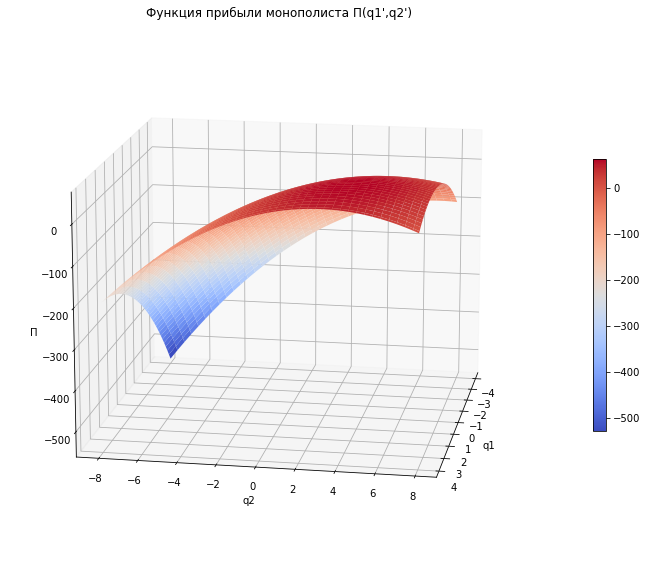

In [65]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Настраиваем 3D график
fig, ax = plt.subplots(figsize=(15,10), subplot_kw={"projection": "3d"})

# Задаем угол обзора
ax.view_init(15, 10)

# Создаем данные для графика
X = np.arange(-4, 4, 0.1)
Y = np.arange(-8, 8, 0.1)
X, Y = np.meshgrid(X, Y)
Z = -P(np.array([X,Y]))

# Рисуем поверхность
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5)
ax.set_title('Функция прибыли монополиста П(q1\',q2\')')
ax.set_xlabel('q1')
ax.set_ylabel('q2')
ax.set_zlabel('П')
plt.show()

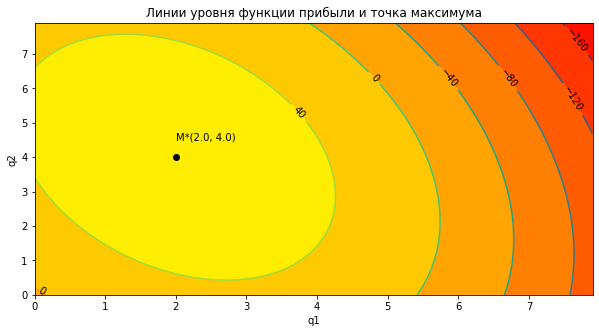

In [66]:
fig, ax = plt.subplots(figsize=(10,5))

u = res.x[0]
v = res.x[1]
X = np.arange(0, 8, 0.1)
Y = np.arange(0, 8, 0.1)
X, Y = np.meshgrid(X, Y)
Z = -P(np.array([X,Y]))

cs = ax.contourf(X, Y, Z, cmap='autumn')
cs_m = ax.contour(X, Y, Z)
ax.plot(u, v, 'ko')
ax.text(u, v+0.5, f'M*({u.round(3)}, {v.round(3)})')
ax.set_title('Линии уровня функции прибыли и точка максимума')
ax.set_xlabel('q1')
ax.set_ylabel('q2')
ax.clabel(cs_m, colors='black')
plt.show()